<a href="https://colab.research.google.com/github/kahunahana/MGMT-5900-_Capstone_Brainiacs-6/blob/main/Cluster_k8_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q google-cloud-bigquery
import os
from google.cloud import bigquery

from google.colab import auth
auth.authenticate_user()

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
project_id = 'thelook-product-recom-1'
client = bigquery.Client(project=project_id)


In [5]:
query = """
SELECT *
FROM `thelook-product-recom-1.theLook.customers_clustered`
"""

# Run the query and load the result into a Pandas DataFrame
df = client.query(query).to_dataframe()


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   user_id               100000 non-null  Int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  Int64  
 3   country               100000 non-null  object 
 4   traffic_source        100000 non-null  object 
 5   lifetime_total_value  100000 non-null  float64
 6   total_order_count     100000 non-null  Int64  
 7   average_order_value   100000 non-null  float64
 8   favorite_category     80127 non-null   object 
 9   favorite_browser      80159 non-null   object 
 10  cluster_number        100000 non-null  Int64  
dtypes: Int64(4), float64(2), object(5)
memory usage: 8.8+ MB


In [8]:
# Identify numerical and categorical columns
numerical_columns = ['age', 'lifetime_total_value', 'total_order_count', 'average_order_value']
categorical_columns = ['gender', 'country', 'traffic_source', 'favorite_category', 'favorite_browser']

# Calculate mean for numerical variables by cluster
numerical_means = df.groupby('cluster_number')[numerical_columns].mean()

# Find most frequent value for categorical variables by cluster
categorical_modes = df.groupby('cluster_number')[categorical_columns].agg(lambda x: x.value_counts().index[0] if x.value_counts().size > 0 else None)

# Print results
print("Numerical Means by Cluster:")
print(numerical_means)
print("\nMost Frequent Categorical Values by Cluster:")
print(categorical_modes)


Numerical Means by Cluster:
                      age  lifetime_total_value  total_order_count  \
cluster_number                                                       
1               41.278994            160.268021           1.511877   
2               41.261815            105.483517           1.231284   
3               41.285928            190.786934             1.6989   
4               40.844538             98.150664           1.482212   
5               40.633553            123.152502                1.5   
6               40.934049            105.339252           1.227832   
7               40.841808            130.873454           1.599897   
8               40.958776              0.000000                0.0   

                average_order_value  
cluster_number                       
1                        109.627810  
2                         67.321186  
3                        118.907437  
4                         64.201787  
5                         80.797755  
6    

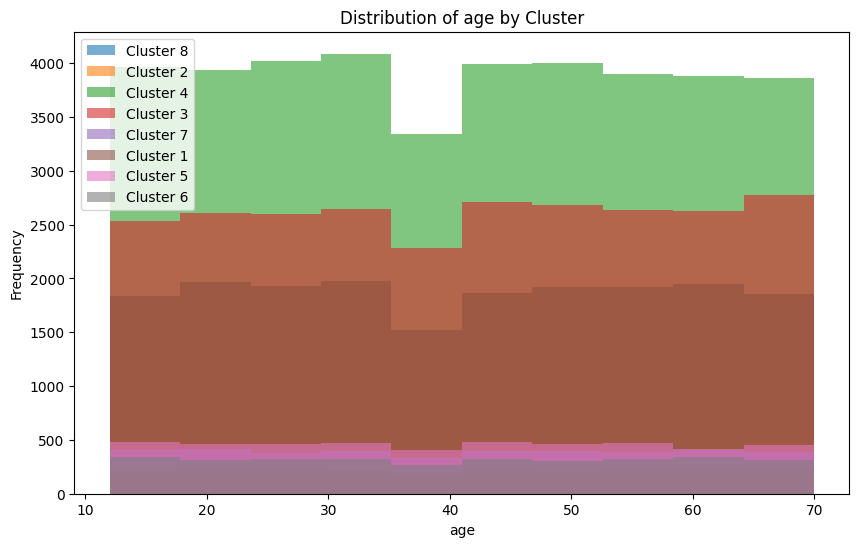

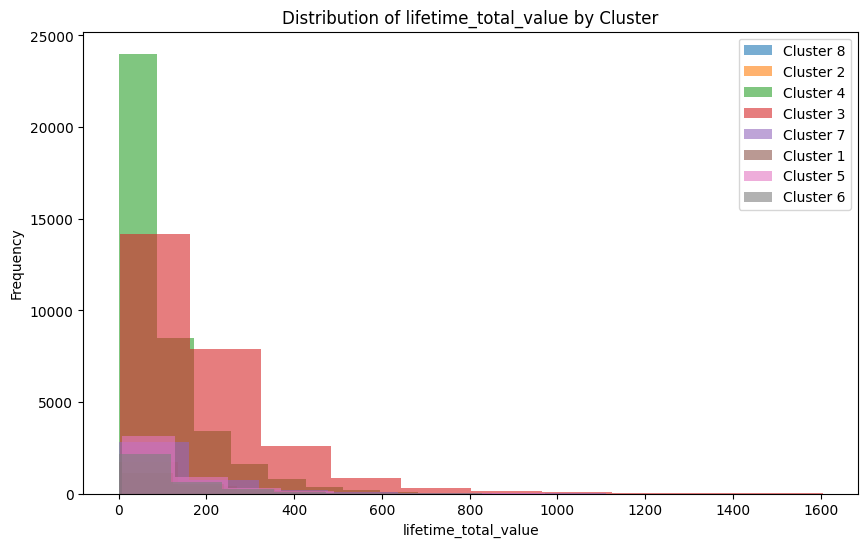

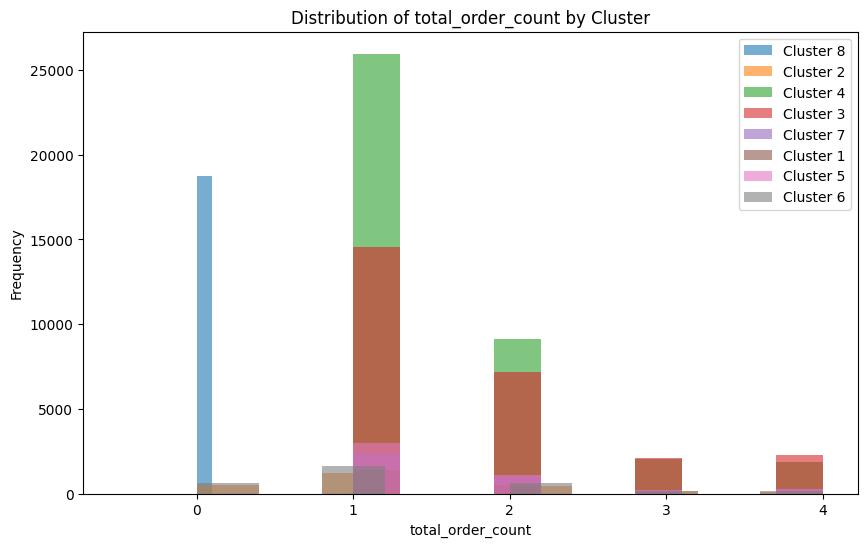

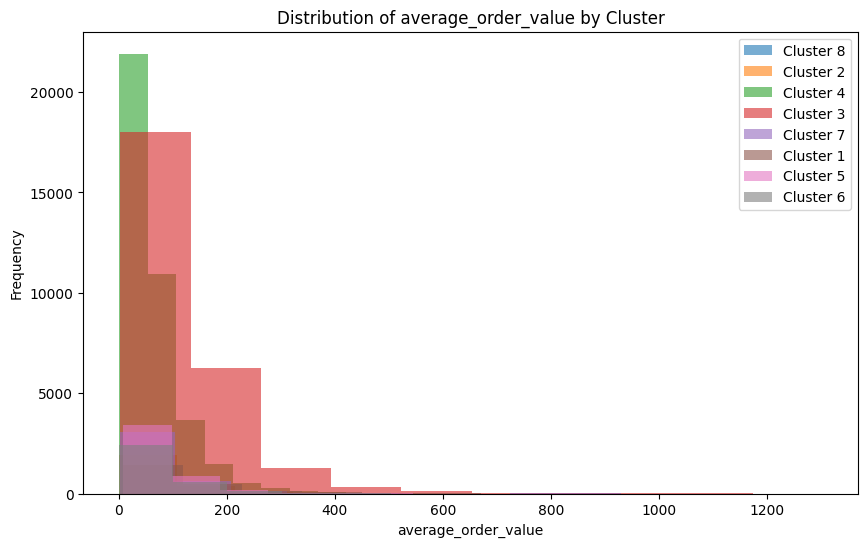

In [9]:


for col in numerical_columns:
    plt.figure(figsize=[10,6])
    for cluster in df['cluster_number'].unique():
        subset = df[df['cluster_number'] == cluster]
        plt.hist(subset[col], alpha=0.6, label=f'Cluster {cluster}')
    plt.title(f'Distribution of {col} by Cluster')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


<Figure size 1000x600 with 0 Axes>

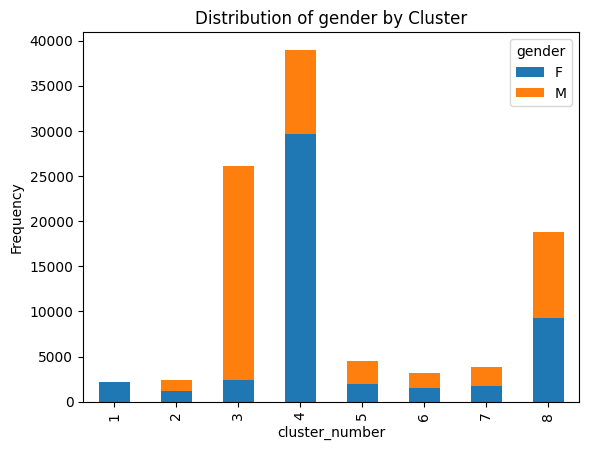

<Figure size 1000x600 with 0 Axes>

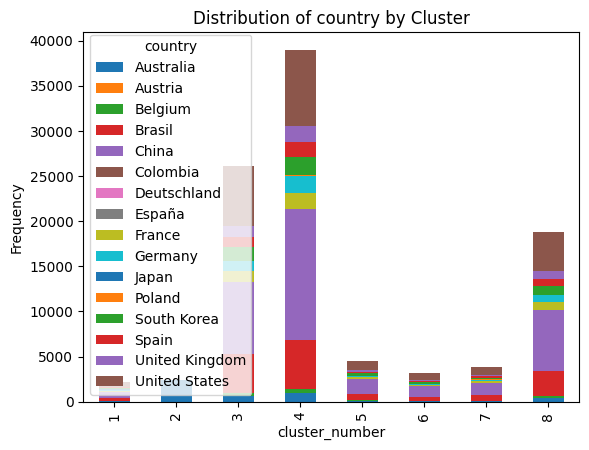

<Figure size 1000x600 with 0 Axes>

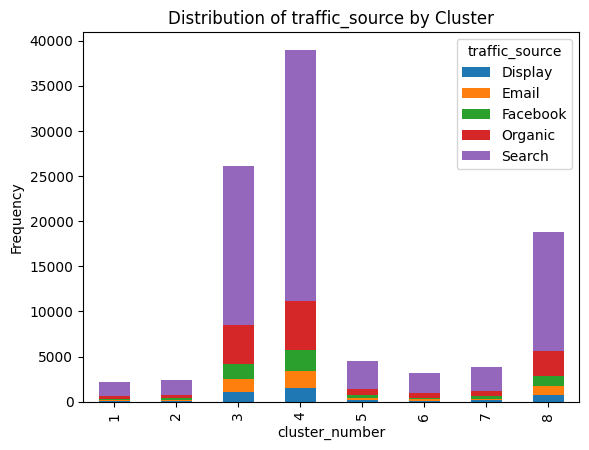

<Figure size 1000x600 with 0 Axes>

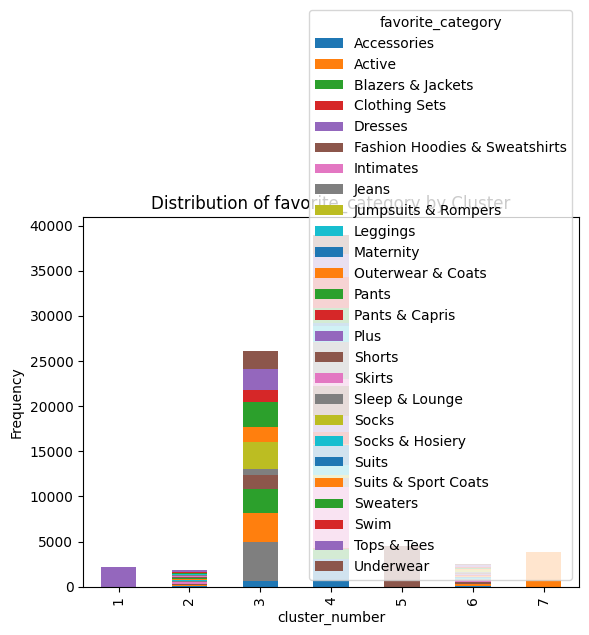

<Figure size 1000x600 with 0 Axes>

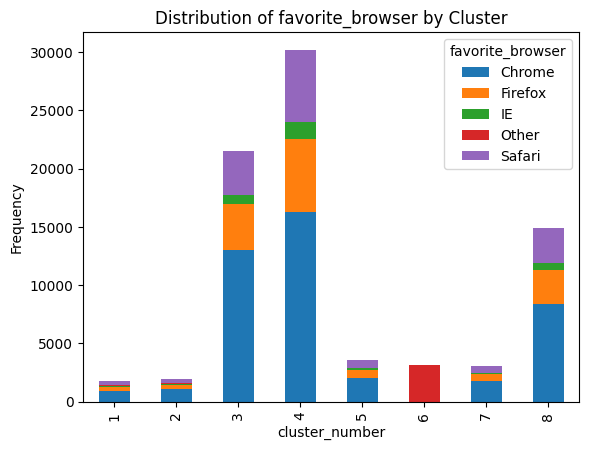

In [10]:
for col in categorical_columns:
    plt.figure(figsize=[10,6])
    df.groupby(['cluster_number', col]).size().unstack().plot(kind='bar', stacked=True)
    plt.title(f'Distribution of {col} by Cluster')
    plt.ylabel('Frequency')
    plt.show()


In [11]:
correlation_matrix = df[numerical_columns].corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                           age  lifetime_total_value  total_order_count  \
age                   1.000000              0.001956           0.003194   
lifetime_total_value  0.001956              1.000000           0.637502   
total_order_count     0.003194              0.637502           1.000000   
average_order_value  -0.000168              0.798986           0.265417   

                      average_order_value  
age                             -0.000168  
lifetime_total_value             0.798986  
total_order_count                0.265417  
average_order_value              1.000000  


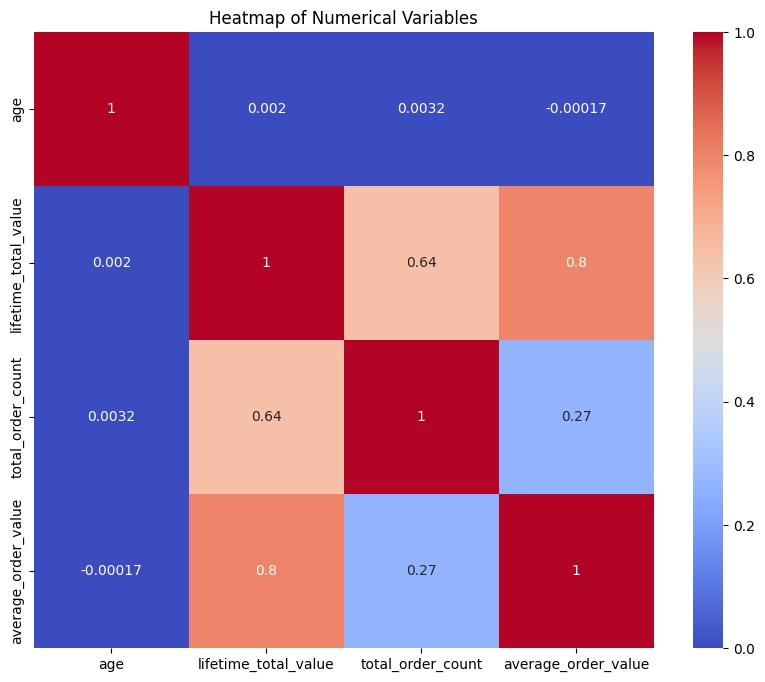

In [12]:
# Assuming your DataFrame is named 'df'
numerical_columns = ['age', 'lifetime_total_value', 'total_order_count', 'average_order_value']

# Compute the correlation matrix
corr = df[numerical_columns].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Numerical Variables')
plt.show()